In [7]:
from sklearn import neighbors
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data 
df = pd.read_csv('/Users/saraskorupa/Documents/rakuten-product-classification/files/X_train_update.csv', index_col='Unnamed: 0')
X_test = pd.read_csv('/Users/saraskorupa/Documents/rakuten-product-classification/files/X_test_update.csv', index_col='Unnamed: 0')
y_train = pd.read_csv('/Users/saraskorupa/Documents/rakuten-product-classification/files/Y_train_CVw08PX.csv', index_col='Unnamed: 0')

# Feature Training Data info
display(df.head(10))
df.info()

,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786
5,Afrique Contemporaine N° 212 Hiver 2004 - Doss...,NaN,5862738,393356830
6,Christof E: Bildungsprozessen Auf Der Spur,NaN,91920807,907794536
7,Conquérant Sept Cahier Couverture Polypro 240 ...,CONQUERANT CLASSIQUE Cahier 240 x 320 mm seyès...,344240059,999581347
8,Puzzle Scooby-Doo Avec Poster 2x35 Pieces,NaN,4239126071,1325918866
9,Tente Pliante V3s5-Pro Pvc Blanc - 3 X 4m50 - ...,Tente pliante V3S5 Pro PVC 500 gr/m² - 3 x 4m5...,3793572222,1245644185


<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ MB


In [10]:
# Cleaning text data - designation
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import nltk

# Download NLTK resources if you don't have them installed
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the Lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Clean function to apply all text cleaning steps
def clean_text(text):
    if pd.isna(text):  # If text is NaN, return empty string
        return ''
    
    # Step 1: Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Step 2: Remove special characters, digits, and punctuation
    text = re.sub(r'[^A-Za-z\s]', '', text)
    
    # Step 3: Convert to lowercase
    text = text.lower()
    
    # Step 4: Remove extra whitespaces
    text = ' '.join(text.split())
    
    # Step 5: Remove stopwords (optional, depends on your use case)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Step 6: Lemmatization
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

# Assuming X_train is your DataFrame and 'designation' is the column to clean
df['cleaned_designation'] = df['designation'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saraskorupa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/saraskorupa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/var/folders/z4/tms7jyg136v2x9gmjn8y6pd40000gn/T/ipykernel_3940/2092961209.py:24: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


Most Common Words:
de: 46716
pour: 11190
le: 9856
en: 9548
x: 9150
la: 8452
et: 7771
cm: 6271
du: 6107
n: 5798
piscine: 4765
lot: 4357
jeu: 4159
avec: 3834
coussin: 3514
pc: 3297
kit: 2682
blanc: 2364
rc: 2364
taie: 2305
enfants: 2252
bois: 2225
led: 2214
mm: 2054
sac: 2025
carte: 2009
bb: 1965
p: 1963
dcor: 1961
nol: 1821
noir: 1797
home: 1793
dcoration: 1774
g: 1771
l: 1767
bleu: 1687
jeux: 1655
bche: 1643
drone: 1609
par: 1588
couverture: 1543
mini: 1512
doreiller: 1445
portable: 1424
journal: 1396
toy: 1371
jouet: 1363
console: 1357
dji: 1356
acier: 1339
figurine: 1303
sur: 1295
au: 1274
lampe: 1264
cadeau: 1248
set: 1241
spa: 1240
magideal: 1228
gris: 1223
voiture: 1221
cuisine: 1206
jardin: 1204
table: 1188
jouets: 1168
canap: 1144
h: 1120
housse: 1113
tome: 1085
pompe: 1071
carnet: 1071
coton: 1025
case: 1009
tapis: 1006
edition: 1001
classique: 992
rouge: 977
support: 953
bulles: 952
tissu: 950
bricolage: 946
v: 913
cover: 910
car: 904
ronde: 902
c: 898
note: 890
rose: 890
vert

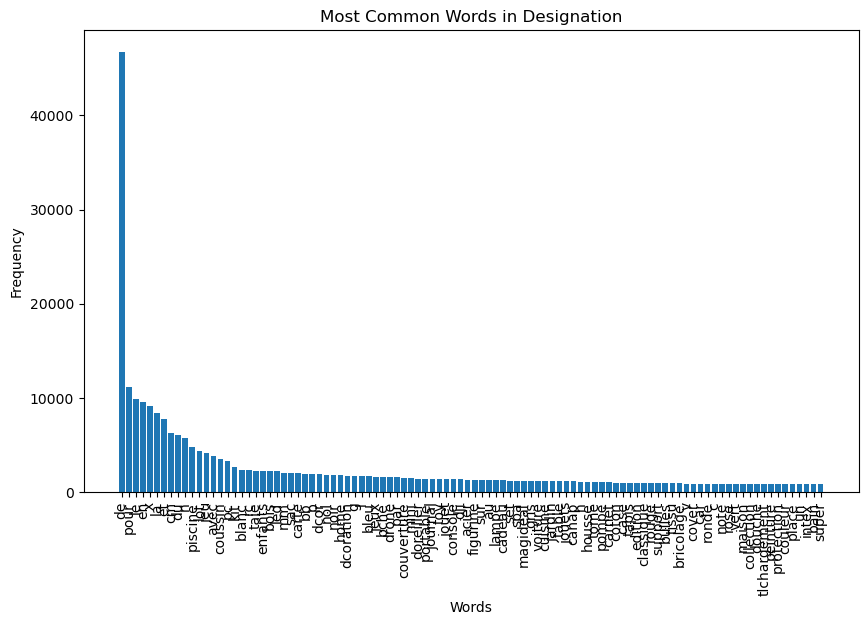

In [6]:
from collections import Counter
import matplotlib.pyplot as plt

# Step 1: Tokenize the text into words (you can use the cleaned_designation column)
all_words = ' '.join(df['cleaned_designation'].dropna()).split()

# Step 2: Count word frequencies
word_counts = Counter(all_words)

# Step 3: Get the most common words
most_common_words = word_counts.most_common(100)

# Step 4: Display the most common words
print("Most Common Words:")
for word, count in most_common_words:
    print(f"{word}: {count}")

# Step 5: Optional - Visualize the most common words
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.title('Most Common Words in Designation')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


In [11]:
# Creating Product Classification list

# Step 1: Define the categories and their keywords
categories = {
    'Home & Garden': ['piscine', 'spa', 'jardin', 'piscine gonflable', 'coussin', 'canapé', 'couverture', 'housse', 'décoratif', 'table', 'fauteuil', 'rideau', 'lit', 'tapis', 'coussin', 'couverture', 'cuisine', 'salle'],
    'Toys & Games': ['jouet', 'jeu', 'jouets', 'figurine', 'puzzle', 'figurine', 'toy', 'console', 'nintendo', 'xbox', 'jeu vidéo', 'robot', 'peluche', 'dragon', 'gamepad'],
    'Tech & Electronics': ['led', 'portable', 'drone', 'camera', 'quadcopter', 'wifi', 'game', 'playstation', 'xbox', 'chargeur', 'batterie', 'dvd', 'power'],
    'Outdoor & Sports': ['sport', 'plage', 'bal', 'table', 'canne à pêche', 'voiture', 'vélo', 'camion', 'gonflable'],
    'Furniture & Decor': ['fauteuil', 'bureau', 'canapé', 'meuble', 'lampe', 'décoration', 'table', 'tapis', 'rideau', 'cadre', 'miroir', 'étagère', 'décor'],
    'Baby & Kids': ['bébé', 'enfant', 'poussette', 'doudou', 'jouet', 'enfant', 'lit bébé', 'bavoir', 'poupée'],
    'Fashion & Accessories': ['mode', 'vêtements', 'sac', 'accessoires', 'bijou', 'chaussettes'],
    'Food & Kitchen': ['cuisine', 'café', 'fruits', 'cuisine', 'panier', 'chocolat'],
    'Books & Stationery': ['livre', 'carnet', 'crayon', 'papier', 'agenda', 'cahier', 'notizbuch', 'journal'],
    'Seasonal': ['hiver', 'halloween', 'printemps', 'Noël']
}

# Step 2: Modify categorization function to check substring presence
def categorize_keyword(text):
    text = text.lower()  # Convert the entire text to lowercase
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword.lower() in text:  # Check if the keyword is a substring of the text
                return category
    return 'Uncategorized'  # Default category if no match is found

# Step 3: Apply the categorization function to the 'cleaned_designation' column
df['category'] = df['cleaned_designation'].apply(categorize_keyword)

# Show the result
print(df[['designation', 'cleaned_designation', 'category']])




                                             designation  \
0      Olivia: Personalisiertes Notizbuch / 150 Seite...   
1      Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
2      Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
3      Peluche Donald - Europe - Disneyland 2000 (Mar...   
4                                   La Guerre Des Tuques   
...                                                  ...   
84911                        The Sims [ Import Anglais ]   
84912  Kit piscine acier NEVADA déco pierre Ø 3.50m x...   
84913  Journal Officiel De La Republique Francaise N°...   
84914  Table Basse Bois De Récupération Massif Base B...   
84915  Gomme De Collection 2 Gommes Pinguin Glace Ver...   

                                     cleaned_designation            category  
0      olivia personalisiertes notizbuch seiten punkt...  Books & Stationery  
1      journal de art le n du lart et son marche salo...  Books & Stationery  
2      grand stylet ergonomique bleu gamep

In [14]:
display(df.head())
category_counts = df['category'].value_counts()
print(category_counts)

,designation,description,productid,imageid,cleaned_designation,category
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,olivia personalisiertes notizbuch seiten punkt...,Books & Stationery
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,journal de art le n du lart et son marche salo...,Books & Stationery
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,grand stylet ergonomique bleu gamepad nintendo...,Toys & Games
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,peluche donald europe disneyland marionnette d...,Toys & Games
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,la guerre de tuques,Uncategorized


category
Uncategorized            40051
Home & Garden            19513
Toys & Games             10511
Tech & Electronics        4418
Outdoor & Sports          2776
Books & Stationery        2760
Fashion & Accessories     2042
Baby & Kids               1466
Furniture & Decor          845
Seasonal                   297
Food & Kitchen             237
Name: count, dtype: int64
